In [34]:
import numpy
import sys
import matplotlib.pyplot as plt
%matplotlib inline
# sys.path.append('C://Users/Wian/Documents/BEng(Hons)/CBT/Skogestad-Python')

In [35]:
import utils

In [36]:
def Gd(s):
    G11 = 4.2/(6.2*s + 1)*numpy.exp(-12*s)
    G21 = 15.9/(6.9*s + 1)*numpy.exp(-10.5*s)
    G31 = -0.8655/(7.01*s + 1)*numpy.exp(-0.6*s)
    G12 = 2800*(-0.028952*s - 0.0011)/((7.85*s +1)*(14.63*s + 1))*numpy.exp(-s)
    G22 = 2800*(-0.062784*s - 0.0032)/((7.29*s +1)*(8.94*s + 1))*numpy.exp(-3.44*s)
    G32 = 2.24/(7.76*s + 1)#*numpy.exp(-2.6*s)
    return numpy.matrix([[G11, G12],
                         [G21, G22],
                         [G31, G32]])

In [37]:
Kc = 1
def G(s):
    G11 = 4.29 * numpy.exp(-2.6 * s) / ((6.7 * s + 1))
    G12 = -2.38 * numpy.exp(-3.5 * s) / ((8.64 * s + 1))
    G13 = -2.156 * numpy.exp(-s) / ((9.06 * s + 1))
    G21 = 7.215 * numpy.exp(-6.5 * s) / ((3.25 * s + 1))
    G22 = -9.218 * numpy.exp(-3.0 * s) / ((5.0 * s + 1))
    G23 = -2.156 * numpy.exp(-s) / ((9.06 * s + 1))
    G31 = -0.5635 * numpy.exp(-9.2 * s) / ((8.15 * s + 1))
    G32 =  0.451143 * numpy.exp(-9.4 * s) / ((10.9 * s + 1))
    G33 = 1.1 * (10.1*s + 0.87) * numpy.exp(-s) / ((3.89 * s + 1)*(18.8*s + 1))
    return numpy.diag([Kc, Kc, Kc])*numpy.matrix([[G11, G12, G13],
                         [G21, G22, G23],
                         [G31, G32, G33]])

In [38]:
omega = numpy.logspace(-2, 3, 1000)
s = omega*1j

In [39]:
sigmas = [numpy.linalg.svd(Gd(si))[1] for si in s]

In [40]:
gd1 = [numpy.linalg.norm(Gd(si)[:,0]) for si in s]
gd2 = [numpy.linalg.norm(Gd(si)[:,1]) for si in s]
# gd = [numpy.linalg.norm(numpy.array(gd1, gd2)) for i in range(len(gd1))]

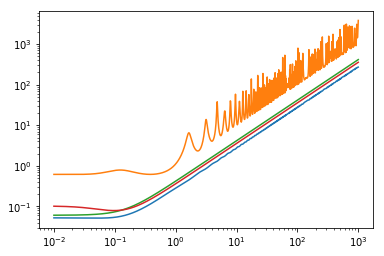

In [45]:
plt.loglog(omega, 1/numpy.array(sigmas))
plt.loglog(omega, 1/numpy.array(gd1))
plt.loglog(omega, 1/numpy.array(gd2))

In [46]:
def S(s):
    return numpy.eye(3) + G(s)

def sigma(Gfr):
    return numpy.linalg.svd(Gfr)

S_freq_responses = [S(si) for si in s]
S_sigmas = [sigma(G_fr)[1] for G_fr in S_freq_responses]
S_sigmas = numpy.array(S_sigmas)

In [64]:
M = 2
A = 0.079
wb = 0.46

def w_p(s, M, A, wb):
    return (s/M + wb)/(s + wb*A)


# plt.loglog(omega, 1/w_p(s))
# # plt.loglog(omega, 1/numpy.array(sigmas))
# plt.loglog(omega, 1/numpy.array(gd1))
# plt.loglog(omega, 1/numpy.array(gd2))
# plt.axhline(1)

Text(0, 0.5, 'Magnitude')

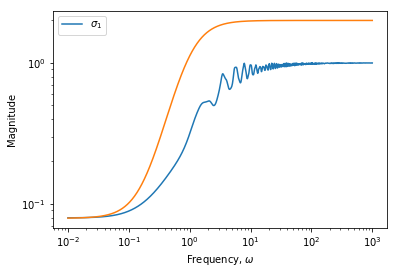

In [66]:
plt.loglog(omega, 1/S_sigmas[:,0], label = '$\sigma_1$')
plt.loglog(omega, 1/w_p(s, 2, 0.079, 0.46))

plt.legend(loc = 0)
plt.xlabel('Frequency, $\omega$')
plt.ylabel('Magnitude')
# 1/S_sigmas

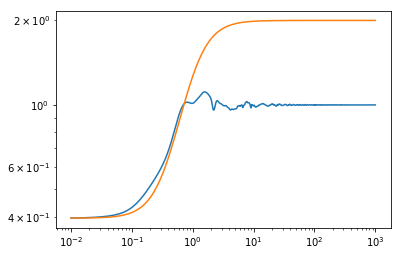

In [67]:
plt.loglog(omega, 1/S_sigmas[:,1], label = '$\sigma_2$')
plt.loglog(omega, 1/w_p(s, 2, 0.395, 0.46))

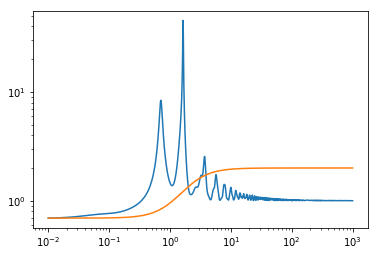

In [68]:
plt.loglog(omega, 1/S_sigmas[:,2], label = '$\sigma_3$')
plt.loglog(omega, 1/w_p(s, 2, 0.692, 1))